In [2]:
import requests as r

In [3]:
url = 'https://api.covid19api.com/dayone/country/brazil'

In [4]:
resp= r.get(url)

In [5]:
resp.status_code

200

In [6]:
raw_data = resp.json()

In [7]:
raw_data[0]

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [8]:
final_data = []
for obs in raw_data:
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

In [9]:
final_data.insert(0, ['Confirmados', 'Obitos', 'Recuperados', 'Ativos', 'Data'])


In [10]:
CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4


In [11]:
for i in range (1, len(final_data)):
    final_data[i][DATA] =  final_data[i][DATA][:10]

In [12]:
import datetime as dt

In [13]:
print(dt.time (20,25,15,35))
print(dt.date(2022,12,31))
print(dt.datetime(2022,12,31,20,25,15,35))

20:25:15.000035
2022-12-31
2022-12-31 20:25:15.000035


In [14]:
aniver_alan = dt.date(1995,3,16)
aniver_gabe = dt.date(1994,9,6)

print(aniver_alan - aniver_gabe)
print((aniver_alan - aniver_gabe).days)
print((aniver_alan - aniver_gabe).seconds)
print((aniver_alan - aniver_gabe).microseconds)

191 days, 0:00:00
191
0
0


In [15]:
import csv

In [16]:
with open('brasil_covid_novo.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(final_data)

In [17]:
for i in range (1, len(final_data)):
    final_data[i][DATA] = dt.datetime.strptime( final_data[i][DATA], '%Y-%m-%d')

In [18]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]  
            })
        return datasets
    else:
        return [{
            'label': labels[0],
            'data': y
            }
        ]

In [19]:
def set_title(title= ''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return {
        'title' : title,
        'display': display
    }

In [20]:
def create_chart (x, y, labels, kind='bar', title=''):
    
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options
    }
    return chart

In [21]:
def get_api_chart (chart):
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f'{url_base}?c={str(chart)}')
    return resp.content

In [22]:
def save_image(path, content):
    with open (path, 'wb') as image:
        image.write(content)
        

In [23]:
!pip install Pillow
from PIL import Image
from IPython.display import display

In [24]:
def display_image (path):
    img_pil = Image.open(path)
    display(img_pil)

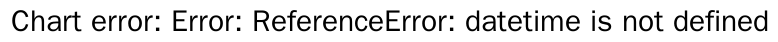

In [27]:
y_data_1 = []
for obs in final_data [1::10]:
    y_data_1.append(obs[0])
    
y_data_2 = []
for obs in final_data [1::10]:
    y_data_2.append(obs[42])
    
labels = ['Confirmados', 'Recuperados']
          
x = []
for obs in final_data [1::10]:
    x.append(obs[DATA].strftime('%d/%m/%Y'))
          
chart = create_chart (x, [y_data_1, y_data_2], labels, title ='Gráfico confirmados x recuperados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png', chart_content)
display_image('meu-primeiro-grafico.png')


In [33]:
y_data_1 = []
for obs in final_data [1::365]:
    y_data_1.append([0])
    print(obs)

[1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)]
[10402913, 251811, 9264696, 874267, datetime.datetime(2021, 2, 25, 0, 0)]
[28679671, 648496, 0, 28031175, datetime.datetime(2022, 2, 25, 0, 0)]
